Для этой задачи я создам примерный проект на основе Keras, который будет включать:

- Загрузку и подготовку данных.
- Построение нейронной сети с использованием Keras API.
- Компиляцию и обучение модели.
- Оценку качества модели.

В качестве примера возьмем датасет с рукописными цифрами MNIST. Модель будет решать задачу классификации изображений цифр.

Подготовка окружения и импорт библиотек


In [1]:
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


1. Загрузка и подготовка данных



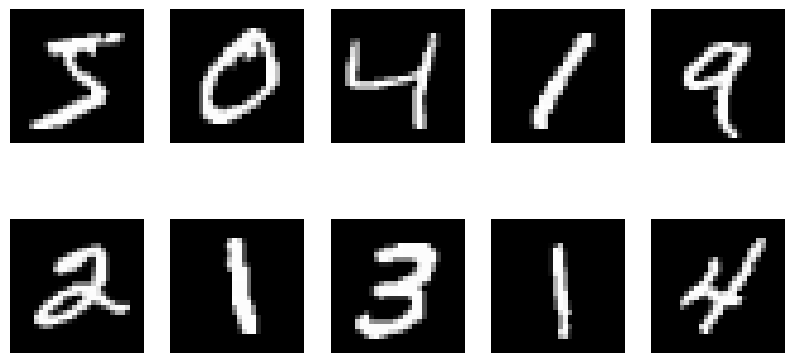

In [2]:
# Загружаем данные MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Нормализуем данные, масштабируя пиксели в диапазоне от 0 до 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Преобразуем метки в категориальные (One-Hot Encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Отобразим несколько примеров данных
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()


2. Построение модели

Мы создадим простую нейронную сеть с одним скрытым слоем.

In [3]:
# Создаем модель с использованием Keras Sequential API
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Преобразуем 28x28 изображение в вектор
    Dense(128, activation='relu'),  # Скрытый слой с 128 нейронами и ReLU активацией
    Dense(10, activation='softmax') # Выходной слой для 10 классов с softmax активацией
])

# Просмотр архитектуры модели
model.summary()


C:\Users\Alexandr\miniconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

3. Компиляция и обучение модели



In [4]:
# Компилируем модель
model.compile(optimizer=Adam(),  # Оптимизатор Adam
              loss='categorical_crossentropy',  # Функция потерь для многоклассовой классификации
              metrics=['accuracy'])  # Метрика точности

# Обучаем модель
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8628 - loss: 0.4894 - val_accuracy: 0.9539 - val_loss: 0.1625
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9601 - loss: 0.1428 - val_accuracy: 0.9654 - val_loss: 0.1165
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9730 - loss: 0.0906 - val_accuracy: 0.9696 - val_loss: 0.1004
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9815 - loss: 0.0641 - val_accuracy: 0.9724 - val_loss: 0.0927
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9858 - loss: 0.0487 - val_accuracy: 0.9718 - val_loss: 0.0913
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9884 - loss: 0.0376 - val_accuracy: 0.9724 - val_loss: 0.0951
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9917 - loss: 0.0278 - val_accuracy: 0.9736 - val_loss: 0.0925
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9940 - loss: 0.0221 - 

4. Оценка качества модели



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9737 - loss: 0.0960
Test Loss: 0.08366946876049042
Test Accuracy: 0.9761999845504761


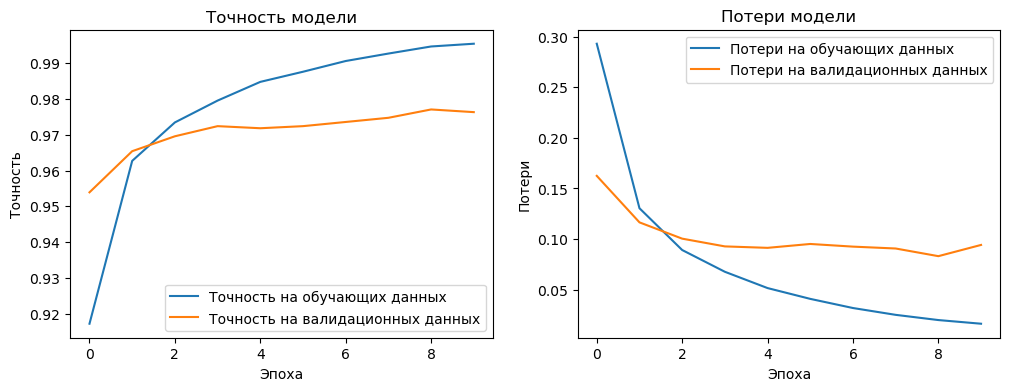

In [5]:
# Оцениваем модель на тестовых данных
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Визуализация точности и функции потерь
plt.figure(figsize=(12, 4))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность на обучающих данных')
plt.plot(history.history['val_accuracy'], label='Точность на валидационных данных')
plt.title('Точность модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

# График функции потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери на обучающих данных')
plt.plot(history.history['val_loss'], label='Потери на валидационных данных')
plt.title('Потери модели')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()

plt.show()


5. Предсказание и визуализация



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


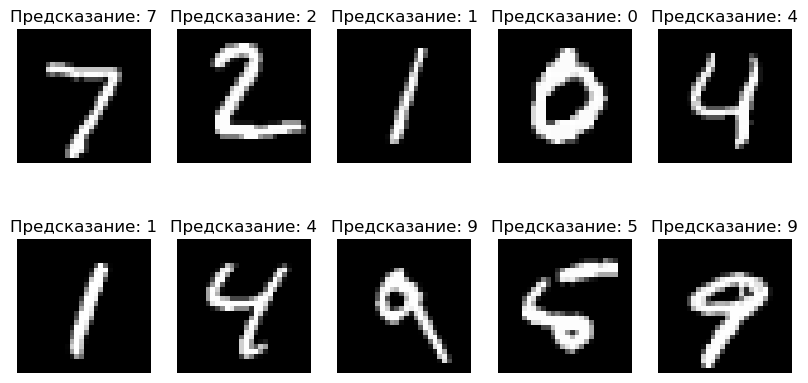

In [6]:
# Прогнозируем на тестовых данных
predictions = model.predict(x_test)

# Визуализация нескольких предсказаний
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Предсказание: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()


Заключение

Этот проект показывает, как можно использовать Keras API для построения, компиляции и оценки модели для классификации изображений.